In [2]:
#Removing error warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the training dataset

import pandas as pd
train_data = pd.read_csv('twitter_training.csv', header=None)
train_data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
#Reading the testing dataset

import pandas as pd
test_data = pd.read_csv('twitter_validation.csv', header=None)
test_data.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
#Renaming the columns of training dataset

train_data.columns = ['Tweet ID', 'Topic', 'Sentiment', 'Tweet']

train_data.head()

,Tweet ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
#Renaming the columns of validation dataset

test_data.columns = ['Tweet ID', 'Topic', 'Sentiment', 'Tweet']

test_data.head()

,Tweet ID,Topic,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
#Shape of Training and Validation data

print('Train data shape: ',train_data.shape) 
print('Test data shape: ',test_data.shape)

Train data shape:  (74682, 4)
Test data shape:  (1000, 4)


In [8]:
#Percentage of null instances per column of Training set

(train_data.isnull().sum()/len(train_data))*100

Tweet ID     0.000000
Topic        0.000000
Sentiment    0.000000
Tweet        0.918561
dtype: float64

In [9]:
#The percentage of null instances in the training set is small, so we'll delete all of them

train_data.dropna(axis=0, inplace=True)

In [10]:
#Deleting duplicate rows

train_data.drop_duplicates(inplace=True)

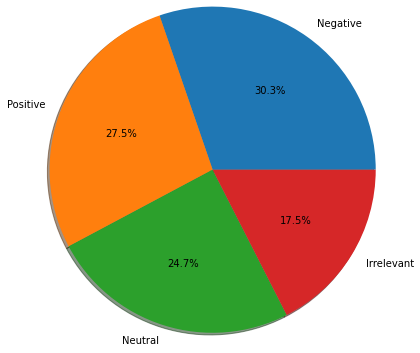

In [11]:
#Since we'll be predicting Sentiment based on Tweet, let's take a look at the distribution of Sentiments in the Training Set

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
label = train_data['Sentiment'].value_counts().index
label_count = train_data['Sentiment'].value_counts().values
plt.pie(data=train_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)
plt.show()

#the distribution of features looks fairly even

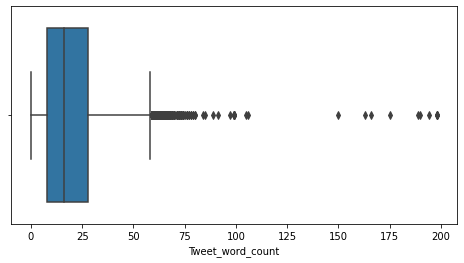

In [12]:
#Getting box plot of word count per tweet so we can delete extreme outliers

import seaborn as sns

train_data['Tweet_word_count']=train_data['Tweet'].apply(lambda x: len(x.split())) #Get the count of words in each tweet
plt.figure(figsize=(8,4))
sns.boxplot(x=train_data['Tweet_word_count'])
plt.show()

#the average number of words per tweet is 23
#tweets with words greater than 125 seem to be extreme outliers

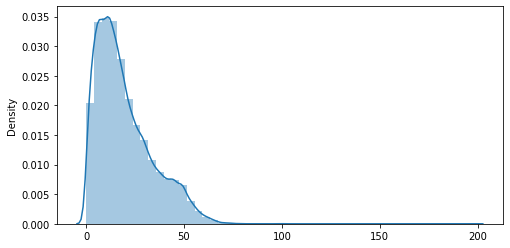

In [13]:
#Checking to see if the number of words per text follow a normal distribution

plt.figure(figsize=(8,4))
sns.distplot(x=train_data['Tweet_word_count'])
plt.show()

#the data is skewed to the right

In [14]:
#Printing out outliers defined as texts with number of words greater than 60

extreme_outliers = train_data['Tweet'][train_data['Tweet_word_count']>60]

for idx in extreme_outliers.index:
    print(idx, 'Target', train_data['Sentiment'][idx])
    print(extreme_outliers[idx])
    print('\n')

124 Target Positive
Finally played through borderlands 3. The actual game I play is great. Almost all guns feel fun, and yet I never once felt much like someone I seriously needed to grind. That pretty story on the other side hand.... All I will say Is that I'm very damn much so forward looking forward to the eventual endless cutscene skip : )


268 Target Irrelevant
4 My favorite games of all time. ( thanks @317Slayer and @Drunk_Cookies! ).. 1. Halo Wars 2 / PlayStation 3 can't even pick. 2 2. New Rocket League. 3. Kingdom Hearts 2. 4. Super Mario Bros All Stars ( this was probably the first game I ever even played ).. @Demintele_Sway... @DiscoSpider93 @Void_BWungus @LSTesports If let ’ s really see em!


334 Target Neutral
Lee Hey borderlands mutuals fam, sorry I've not been interacting as directly and or playing games as fun much as I had really been but I really love ya'll too so much. Thank you for reminding me fandom game isn't just a giant time cesspool. I Thank you for having s



39424 Target Neutral
I feel bad just for always making this extremely nice person wait it All out so long for a new duel. I legit almost said " Ok No thanks, I'm grinding ladder tonight. " I gave in straight after a friend had wanted a duel and I allowed it. This @RowninAdam dude... is rad!. youtube. com / watch? hand v = wceENI …


39562 Target Negative
Me : oh I've created a fantastic deck games that synergize very well!.. Hearthstone : you want this all all your favorite healers first?.. Me : what? No stop that...... Hs : you want these all in your buffing spells next?.. and Me : stop.. Hs : and right now your at 10 hp you want your taunts?.. just Me : why...


39634 Target Irrelevant
First Community ban dealing with 13 / 11 K / 6 D after killing someone via intentionally shooting at his exposed legs. I now wonder that me who struggled getting 1 + K / 24 D would certainly be suspected hacking, why that 30 / 0 K / 9 D guy was not the first one, or is this possibly the complement fo

Johnson & Johnson Beats Q1 Estimates, Raises Dividend.. “ Johnson & Johnson $ JNJ stock rose 4. 7 % as of 3 12 : 30 PM ET today. Investors that are optimistic too about the acquired company ’ s strong 2008 first - last quarter results and a dividend hike. ”... from marketrealist. com / 2020 / 28 04 / johnso … ISBN https://t.co/i61Bk0GdRH ]


66148 Target Negative
@JNJNews advertises ( particularly supports ) Tucker and Carlson. Because Tucker is actually the Fox host that only told to us " they are coming to get you. " We all know who " they " are... You support a racist Johnson & Johnson. You can't always say Black Christian Lives Works Matter shit when you do that. Shame on you!!!!


66250 Target Neutral
Read US Life News Be Now A big Missouri appeals for court on Tuesday ordered Johnson & Johnson and a Missouri subsidiary to pay $ 2. 08 1 billion in damages to women who falsely blamed their ovarian bone cancer on the company and ’ s talcum products, including its potentially iconic 

In [15]:
#Removing outliers from training data set

train_data = train_data[train_data['Tweet_word_count']<60]

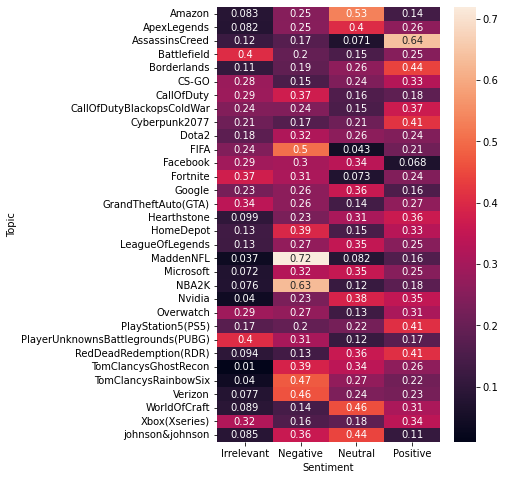

In [16]:
#Determining the correlation between Topic and Sentiment

plt.figure(figsize=(5, 8))
sns.heatmap(pd.crosstab(train_data['Topic'], train_data['Sentiment'], normalize='index'), annot=True)
plt.show()

#No significant correlation between Topic and Sentiment
#Tweet ID and Topic will not be considered as input features

In [17]:
#Creating functions used for preprocessing the data 

import re
from nltk.corpus import stopwords


import nltk
#nltk.download('omw-1.4')
#nltk.download('wordnet')
#nltk.download('punkt')

stopwords_list = stopwords.words('english')


#converting to lowercase
def lower_case(text):
    return text.lower() 

    
#removing urls 
def remove_urls(text): 
    pattern = re.compile('(\w+\.com ?/ ?.+)|(http\S+)')
    return re.sub(pattern, '', text) 


#removing double space
def remove_double_space(text):
    pattern = re.compile(' +')
    return re.sub(pattern, ' ', text)
    
    
#removing punctuation
def remove_punctuation(text):
    pattern = re.compile('[^a-z ]')
    return re.sub(pattern, ' ', text) 
    
    
#removing stop words (commonly used words in a language)
def remove_stopwords(text):
    new_text =''
    for w in text.split(' '):
        if w not in stopwords_list:
            new_text = new_text + w + ' '
    return new_text
    
    
#removing numbers
def remove_numbers(text):
    pattern = re.compile('\d+')
    return re.sub(pattern, '', text) 

   
#Lemmatizing (example: runs -> run)
from nltk.stem import WordNetLemmatizer
def lemmatize(text):
    word_list = nltk.word_tokenize(text)
    lmtzr = WordNetLemmatizer()
    return ' '.join([lmtzr.lemmatize(w) for w in word_list])

In [18]:
#Adding the Clean_Tweet column to the training dataset containing tweets that have been preprocessed

train_data['Clean_Tweet'] = train_data['Tweet']
train_data['Clean_Tweet'] = train_data['Clean_Tweet'].apply(lower_case)
train_data['Clean_Tweet'] = train_data['Clean_Tweet'].apply(remove_urls)
train_data['Clean_Tweet'] = train_data['Clean_Tweet'].apply(remove_double_space)
train_data['Clean_Tweet'] = train_data['Clean_Tweet'].apply(remove_punctuation)
train_data['Clean_Tweet'] = train_data['Clean_Tweet'].apply(remove_stopwords)
train_data['Clean_Tweet'] = train_data['Clean_Tweet'].apply(remove_numbers)
train_data['Clean_Tweet'] = train_data['Clean_Tweet'].apply(lemmatize)

train_data

,Tweet ID,Topic,Sentiment,Tweet,Tweet_word_count,Clean_Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,11,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,im getting borderland murder
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,26,realized window partition mac like year behind...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,23,realized mac window partition year behind nvid...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,25,realized window partition mac year behind nvid...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,32,realized window partition mac like year behind...


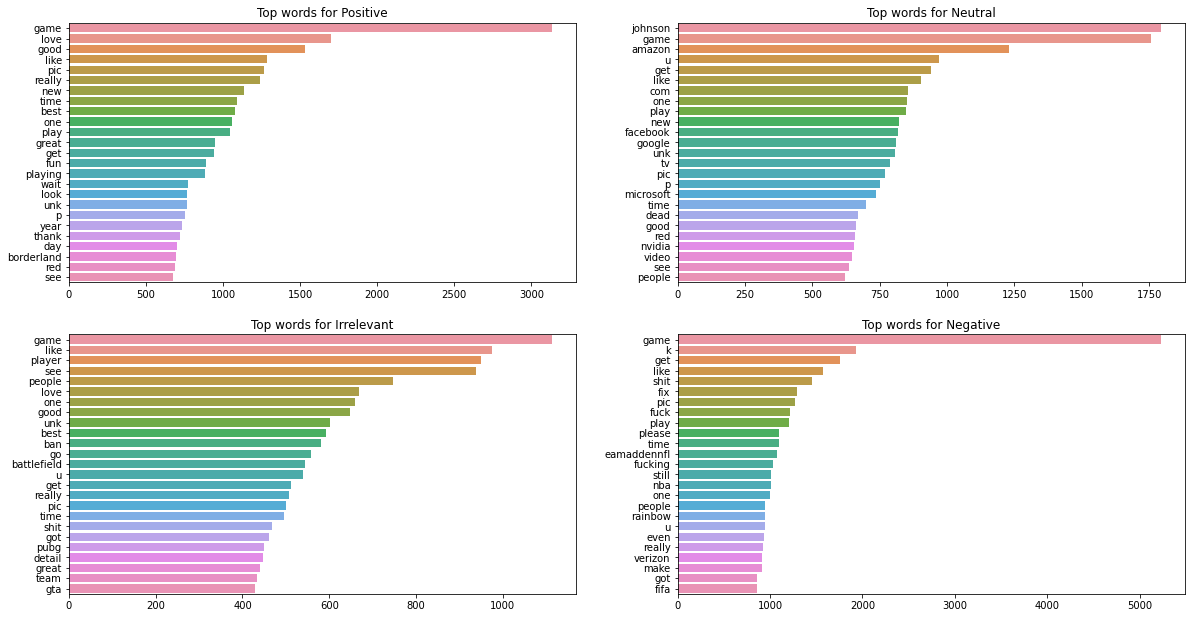

In [19]:
#Let's view the most common words in each Sentiment category

word_counts = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}


for text, sentiment in zip(train_data['Clean_Tweet'], train_data['Sentiment']):
    word_counts[sentiment].extend(text.split())
    
    
fig, axes = plt.subplots(2, 2, figsize=(20,10.5))
for axis, (sentiment, words) in zip(axes.flatten(), word_counts.items()):
    bar_info = pd.Series(words).value_counts()[:25]
    sns.barplot(x=bar_info.values, y=bar_info.index, ax=axis)
    axis.set_title(f'Top words for {sentiment}')
    
plt.show()

#there is a clear difference between the common words in the Positive and Negative category

In [20]:
#Adding the Clean_Tweet column to the testing dataset containing tweets that have been preprocessed

test_data['Clean_Tweet'] = test_data['Tweet']
test_data['Clean_Tweet'] = test_data['Clean_Tweet'].apply(lower_case)
test_data['Clean_Tweet'] = test_data['Clean_Tweet'].apply(remove_urls)
test_data['Clean_Tweet'] = test_data['Clean_Tweet'].apply(remove_double_space)
test_data['Clean_Tweet'] = test_data['Clean_Tweet'].apply(remove_punctuation)
test_data['Clean_Tweet'] = test_data['Clean_Tweet'].apply(remove_stopwords)
test_data['Clean_Tweet'] = test_data['Clean_Tweet'].apply(remove_numbers)
test_data['Clean_Tweet'] = test_data['Clean_Tweet'].apply(lemmatize)

test_data

,Tweet ID,Topic,Sentiment,Tweet,Clean_Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorly samsungus c...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping american face really commit...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto art culture capital canada wonder want...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewer one people...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small win


In [21]:
#Extracting input features and output variables from the training set

X_train= train_data['Clean_Tweet']
y_train= train_data['Sentiment']

In [22]:
#Vectorizing the training set (Convert a collection of raw documents to a matrix of TF-IDF features)

#TfidfVectorizer converts a collection of text documents to a matrix of token counts
#One Hot Encoder is used for categorical variable 
#OHE will create column for all categories and add 1 or 0 as per its presence in the row


from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3), min_df=10, max_features=10000) 
X_train = vectorizer.fit_transform(X_train)


X_train.shape

(71024, 10000)

In [23]:
#Logistic Regression
#Determining optimum hyperparameters using the train/validation set 
#Gridsearch with 5-fold cross-validation (due to limitations, the parameters were changed manually)


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=42)

param_grid={'penalty':['l2'],
            'C':[4.2],
            'solver':['newton-cg']}


grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [4.2], 'penalty': ['l2'],
                         'solver': ['newton-cg']},
             scoring='accuracy')

In [24]:
grid.best_params_

{'C': 4.2, 'penalty': 'l2', 'solver': 'newton-cg'}

In [25]:
#Extracting input features and output variables from the testing set

X_test= test_data['Clean_Tweet']
y_test= test_data['Sentiment']

In [26]:
#Vectorizing the testing set 

X_test = vectorizer.transform(X_test)

X_test.shape

(1000, 10000)

In [27]:
#Determining predictions on unseen test set

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = grid.predict(X_test)
acc_score = '{:.2%}'.format(accuracy_score(y_test,pred))
print("Results on Test Set of Logistic Regression Classifier")
print("\n Accuracy Score:\n",acc_score)


Results on Test Set of Logistic Regression Classifier

 Accuracy Score:
 91.20%


In [28]:
#Print classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  Irrelevant       0.90      0.89      0.89       172
    Negative       0.91      0.94      0.92       266
     Neutral       0.97      0.89      0.93       285
    Positive       0.88      0.92      0.90       277

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



<AxesSubplot:>

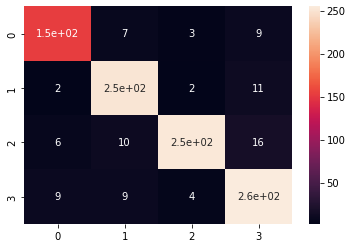

In [29]:
#Plotting the confusion matrix using a heat map

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [ ]:
#XGBoost
#Due to the very high number of features, XGBoost is taking a very long time to run

import xgboost as xgb

X_train_dense= X_train.todense()

dic = {
    'Positive': 0,
    'Neutral': 1,
    'Irrelevant': 2,
    'Negative': 3
}

y_train_int = y_train.map(dic) 



xgboost = xgb.XGBClassifier(use_label_encoder=False, random_state=42)

param_grid={'n_estimators':[5],
            'max_depth':[5],
            'eta':[0.3], 
            'min_child_weight':[20], 
            'reg_alpha':[0.2], 
            'reg_lambda':[1], 
            'gamma':[0]}



grid = GridSearchCV(xgboost, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train_dense, y_train_int)

[10:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
